In [1]:
import numpy as np
import operator

In [2]:
def createDataSet():
    group = np.array([[1.0, 1.1],[1.0, 1.0],[0, 0],[0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
group, labels = createDataSet()
print(group)
print(labels)

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']


In [4]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0] #计算数据集dataSet的行数
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet   #S算得两点各坐标值之差
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis = 1)  #坐标差值平方再加和
    distances = sqDistances ** 0.5   #开方
    sortedDistIndicies = distances.argsort()  #将各个样本与inX的距离按从小到大排序，返回索引值
    classCount = {}  #定义了一个dictionry
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]  #返回最高的key值

In [5]:
classify0([0,0], group, labels, 3 )

'B'

In [8]:
def file2matrix(filename):
    love_dictionary = {'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOflines = len(arrayOLines)  #得到数据集的行数
    returnMat = np.zeros((numberOflines, 3))
    classLabelVector = []  #prepare labels return
    index = 0
    for line in arrayOLines:
        line = line.strip()  #去除首尾空格
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        if(listFromLine[-1].isdigit()):
            classLabelVector.append(int(listFromLine[-1]))
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [9]:
datingDataMat, datingLabels = file2matrix('./datingTestSet.txt')
print(datingDataMat)
print(datingLabels)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

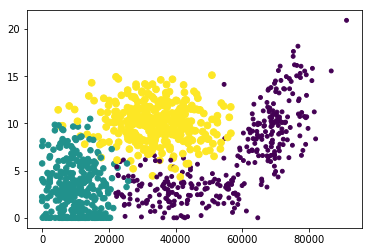

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,0], datingDataMat[:,1],15.0*np.array(datingLabels),15.0*np.array(datingLabels))
plt.show()

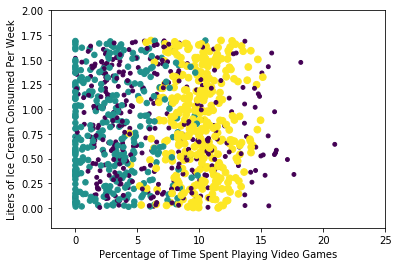

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.scatter(datingDataMat[:,1], datingDataMat[:,2])
ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*np.array(datingLabels),15.0*np.array(datingLabels))
ax.axis([-2,25,-0.2,2.0])
plt.xlabel('Percentage of Time Spent Playing Video Games')
plt.ylabel('Liters of Ice Cream Consumed Per Week')
plt.show()

In [21]:
def autoNorm(dataSet):
    """对于数据进行归一化处理"""
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [22]:
normMat, ranges, minVals = autoNorm(datingDataMat)
print(normMat)
print(ranges)
print(minVals)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


In [29]:
def datingClassTest():
    hoRatio = 0.1  #干嘛用？
    datingDataMat, datingLabels = file2matrix('./datingTestSet2.txt')   #加载测试文件并产生数据
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0 
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m, :],datingLabels[numTestVecs:m],3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("The total error rate is: %f" %(errorCount / float(numTestVecs)))
    print(errorCount)

In [30]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

In [31]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input("Percentage of time spent playing video games?"))
    ffMiles = float(input("Frequent flier miles earned per year?"))
    iceCream = float(input("Liter of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('./datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr - minVals) / ranges, normMat, datingLabels, 3)
    print("You will probably like this person: %s" % resultList[classifierResult -1])

In [33]:
classifyPerson()

Percentage of time spent playing video games?10
Frequent flier miles earned per year?1000
Liter of ice cream consumed per year?0.5
You will probably like this person: in small doses


### 手写体识别系统

In [34]:
def img2vector(filename):
    """将数字图像文本形式转换为numpy矩阵"""
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    return returnVect

In [36]:
testVector = img2vector('./digits/testDigits/0_13.txt')
testVector[0,0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
def handWritingClassTest():
    hwLabels = []
    trainingFileList = listdir('./digits/trainingDigits') # 加载所有训练用数字文本文件
    m = len(trainingFileList)
    trainingMat = np.zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('./digits/trainingDigits/%s' % fileNameStr)
    testFileList = listdir('./digits/testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('./digits/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("The classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if classifierResult != classNumStr:
            errorCount += 1.0
    print("\nThe total number of error is: %d" % errorCount)
    print("\nThe total error rate is : %f" % (errorCount / float(mTest)))

In [41]:
from os import listdir
handWritingClassTest()

The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answe

The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answe

The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answe

The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answer is: 4
The classifier came back with: 4, the real answe

The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answer is: 6
The classifier came back with: 6, the real answe

The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answer is: 7
The classifier came back with: 7, the real answe

The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answer is: 9
The classifier came back with: 9, the real answe